In [4]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
sns.set()

In [5]:
import math
def gaussian_mixture_circle(datasize, num_cluster=8, scale=1, std=1):
    rand_indices = np.random.randint(0, num_cluster, size=datasize)
    base_angle = math.pi * 2 / num_cluster
    angle = rand_indices * base_angle - math.pi / 2
    mean = np.zeros((datasize, 2), dtype=np.float32)
    mean[:, 0] = np.cos(angle) * scale
    mean[:, 1] = np.sin(angle) * scale

    return np.random.normal(mean, std, (datasize, 2)).astype(np.float32)

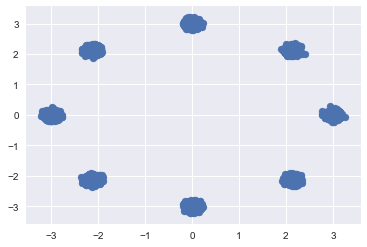

In [7]:
data = gaussian_mixture_circle(10000, std=0.07, scale=3)
plt.scatter(data[:, 0], data[:, 1])

In [83]:
def gaussian_mixture_double_circle(batchsize, num_cluster=8, scale=1, std=1):
    rand_indices = np.random.randint(0, num_cluster, size=batchsize)
    base_angle = math.pi * 2 / num_cluster
    angle = rand_indices * base_angle - math.pi / 2
    mean = np.zeros((batchsize, 2), dtype=np.float32)
    mean[:, 0] = np.cos(angle) * scale
    mean[:, 1] = np.sin(angle) * scale
    # Doubles the scale in case of even number
    even_indices = np.argwhere(rand_indices % 2 == 0)
    mean[even_indices] /= 2
    return np.random.normal(mean, std**2, (batchsize, 2)).astype(np.float32)


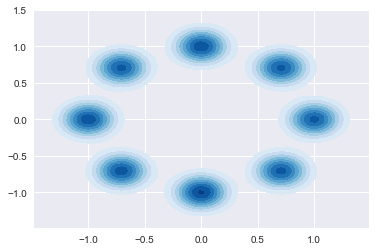

In [8]:
data = gaussian_mixture_circle(10000, std=0.01, scale=1)
sns.kdeplot(data=data[:, 0], data2=data[:,1],
            shade=True, cmap="Blues", shade_lowest=False)

# 生成データと，KDEを並べて表示

In [25]:
# generate data
scale=2
data = gaussian_mixture_circle(10000, std=0.02, scale=scale)

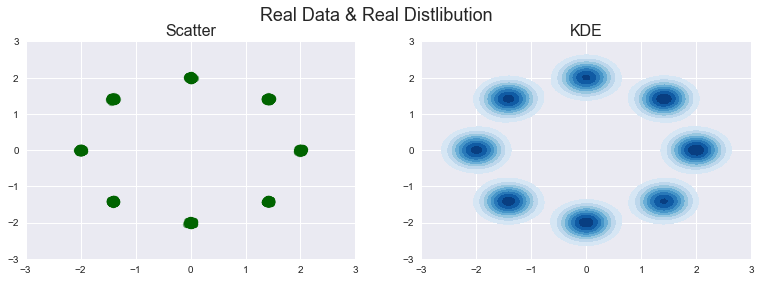

In [27]:
fig, ax = plt.subplots(1,2, figsize=(13, 4))
ax[0].scatter(data[:, 0], data[:, 1], color="darkgreen", alpha=0.5)
ax[0].set_title("Scatter", fontsize=16)
ax[0].set_xlim(-scale-1, scale+1)
ax[0].set_ylim(-scale-1, scale+1)
sns.kdeplot(data=data[:, 0], data2=data[:,1],
            shade=True, cmap="Blues", shade_lowest=False, ax=ax[1])
ax[1].set_title("KDE", fontsize=16)
ax[1].set_xlim(-scale-1, scale+1)
ax[1].set_ylim(-scale-1, scale+1)
fig.suptitle("Real Data & Real Distlibution", y=1, fontsize=18)
fig.savefig("real_data.jpg")